In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
data = pd.read_csv("C:/Users/Adamin/Desktop/DMML-Project/Diabetes/diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
print(data.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [5]:
data['Diabetes_012'].replace([2],
                        [1], inplace=True)

In [6]:
target_name = 'Diabetes_012'
data_target = data[target_name]
data = data.drop([target_name], axis=1)

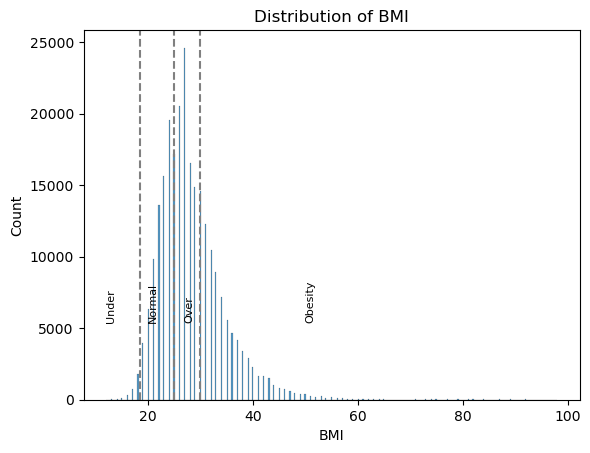

In [7]:
# plot the distribution of BMI  

# The World Health Organization (WHO) defines the following BMI ranges for adults:

# Underweight: BMI less than 18.5
# Normal weight: BMI between 18.5 and 24.9
# Overweight: BMI between 25 and 29.9
# Obesity: BMI of 30 or greater

plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')

# add text
plt.text(12, 5500, 'Under', rotation=90, size=8)
plt.text(20, 5500, 'Normal', rotation=90, size=8)
plt.text(27, 5500, 'Over', rotation=90, size=8)
plt.text(50, 5500, 'Obesity', rotation=90, size=8)

sns.histplot(data['BMI'], kde=False)

plt.title('Distribution of BMI')
plt.show()

In [8]:
train, test, target, target_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [9]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.2, random_state=0)

In [63]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, target)
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Correlation
0,HighChol,0.646521
1,CholCheck,0.571117
13,MentHlth,0.534383
6,PhysActivity,0.199955
17,Age,0.149832
16,Sex,0.112292
18,Education,0.087697
5,HeartDiseaseorAttack,0.075733
3,Smoker,0.048252
4,Stroke,0.003902


In [11]:
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

84.59

In [12]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

84.56

In [13]:
from sklearn.metrics import confusion_matrix
predicted=logreg.predict(test)
predicted1=logreg.predict(train)
print(target_test)

198433    0.0
162094    0.0
81877     0.0
137629    0.0
138898    1.0
         ... 
22855     0.0
121922    0.0
232355    0.0
208496    1.0
232431    0.0
Name: Diabetes_012, Length: 50736, dtype: float64


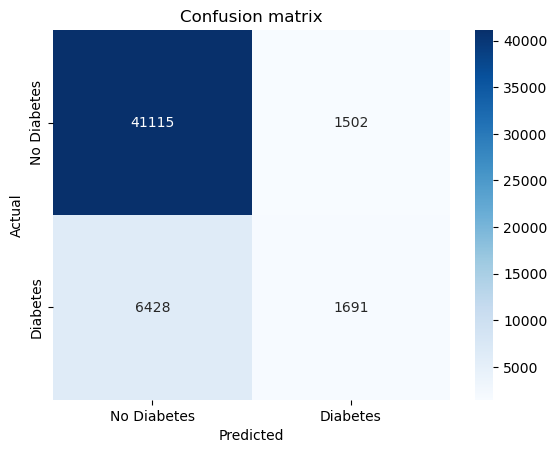

In [54]:
import seaborn as sns
cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.yticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.title('Confusion matrix')
plt.show()

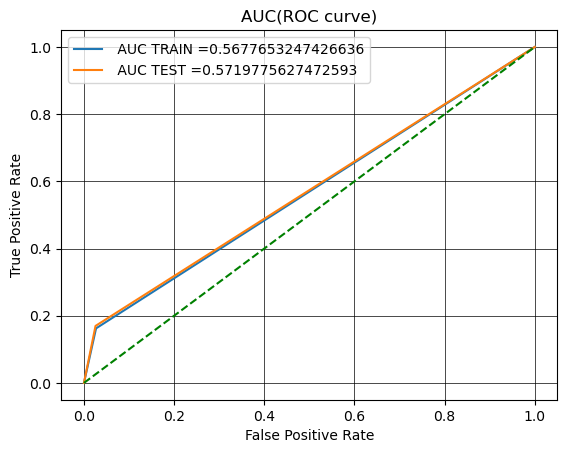

In [15]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

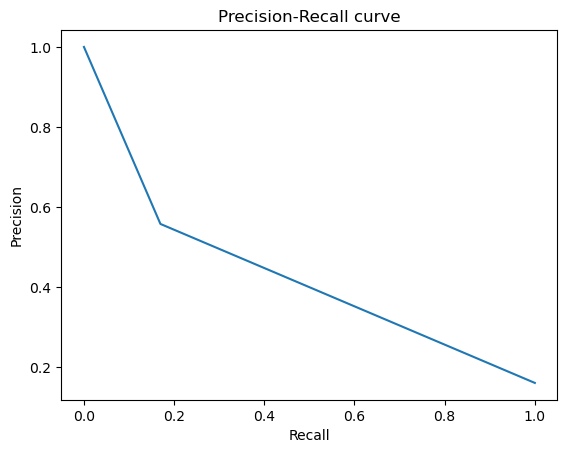

In [16]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [17]:
perceptron = Perceptron()
perceptron.fit(train, target)
acc_perceptron = round(perceptron.score(train, target) * 100, 2)
acc_perceptron

84.31

In [18]:
acc_test_perceptron = round(perceptron.score(test, target_test) * 100, 2)
acc_test_perceptron

83.99

In [19]:
predicted=perceptron.predict(test)
predicted1=perceptron.predict(train)
confusion_matrix(target_test, predicted)

array([[42566,    51],
       [ 8070,    49]], dtype=int64)

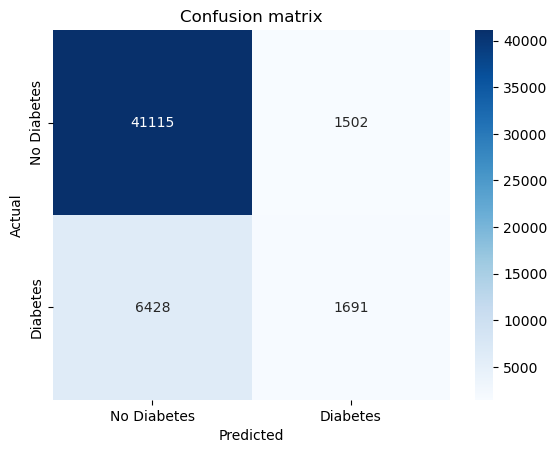

In [55]:
cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.yticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.title('Confusion matrix')
plt.show()

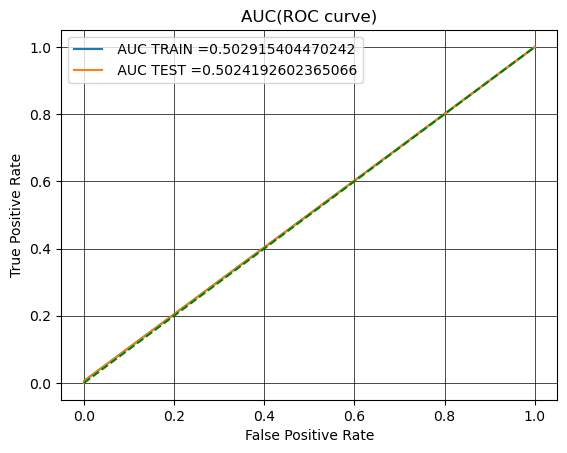

In [21]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

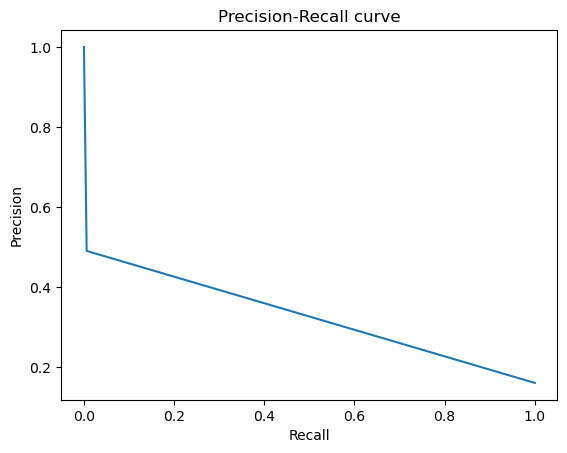

In [22]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [23]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

76.56

In [24]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

77.01

In [25]:
predicted=gaussian.predict(test)
predicted1=gaussian.predict(train)
confusion_matrix(target_test, predicted)

array([[34428,  8189],
       [ 3475,  4644]], dtype=int64)

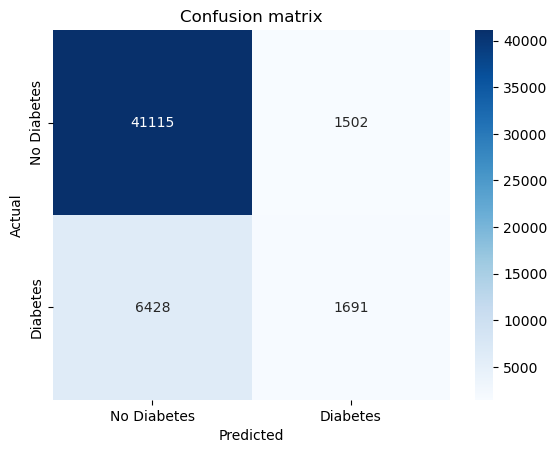

In [56]:
cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.yticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.title('Confusion matrix')
plt.show()

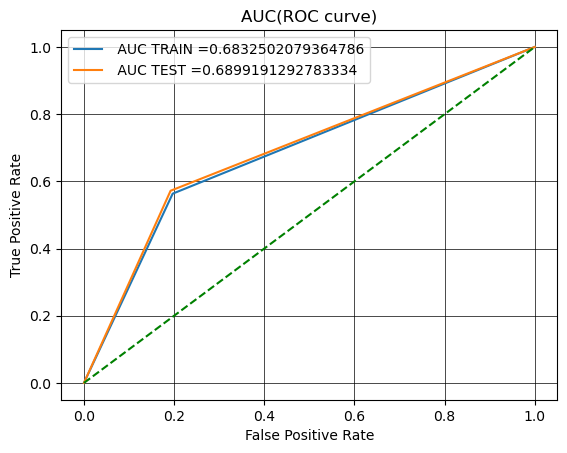

In [27]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

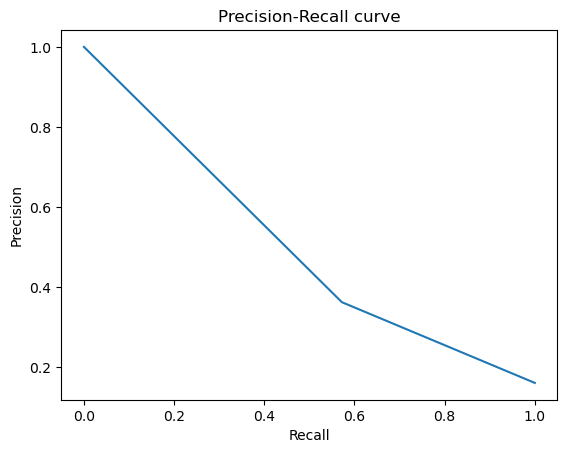

In [28]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [29]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
acc_decision_tree = round(decision_tree.score(train, target) * 100, 2)
acc_decision_tree

99.35

In [30]:
acc_test_decision_tree = round(decision_tree.score(test, target_test) * 100, 2)
acc_test_decision_tree

77.61

In [31]:
predicted=decision_tree.predict(test)
predicted1=decision_tree.predict(train)
confusion_matrix(target_test, predicted)

array([[36584,  6033],
       [ 5325,  2794]], dtype=int64)

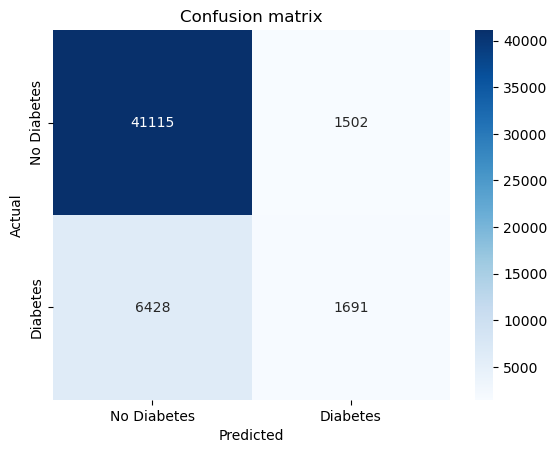

In [57]:
cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.yticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.title('Confusion matrix')
plt.show()

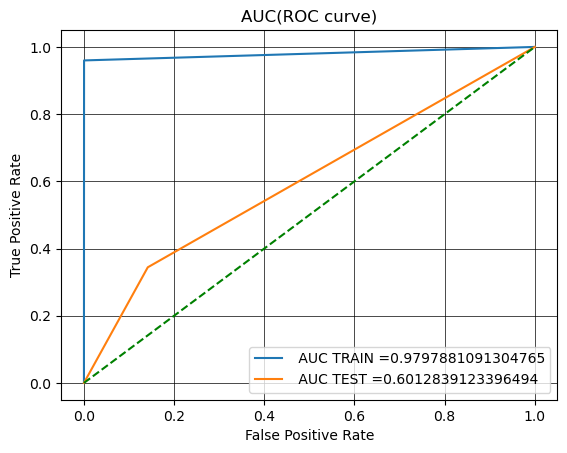

In [33]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

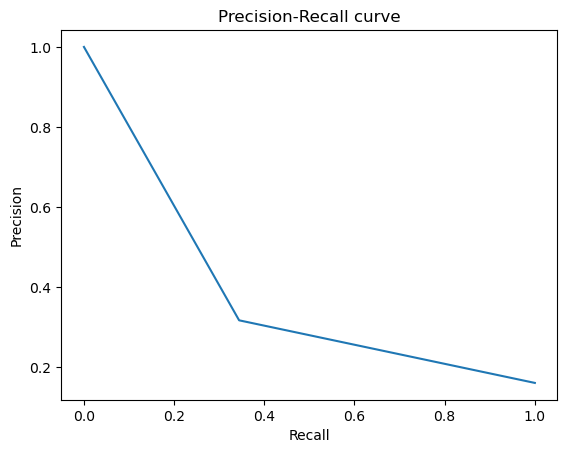

In [34]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [35]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

99.35 {'n_estimators': 300}


In [36]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

84.37

In [37]:
predicted=random_forest.predict(test)
predicted1=random_forest.predict(train)
confusion_matrix(target_test, predicted)

array([[41115,  1502],
       [ 6428,  1691]], dtype=int64)

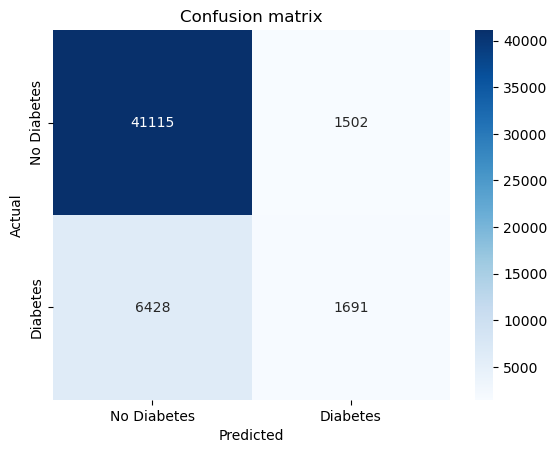

In [58]:
cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.yticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.title('Confusion matrix')
plt.show()

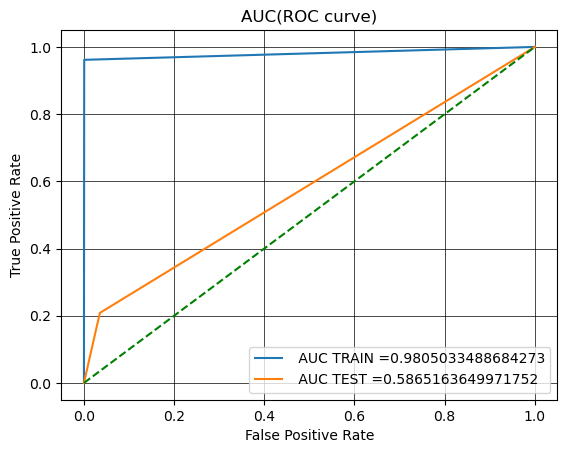

In [39]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

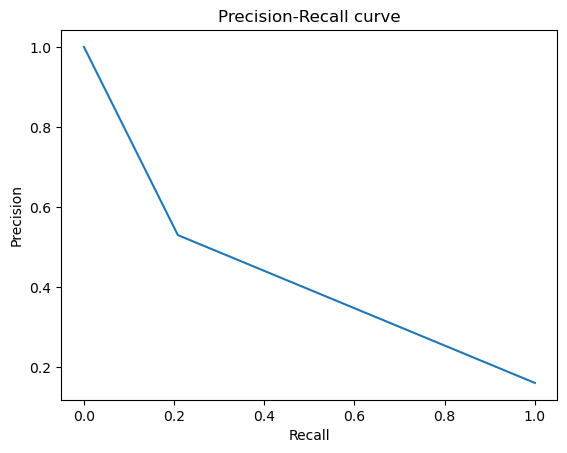

In [40]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [50]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Perceptron', 'Naive Bayes', 'Decision Tree Classifier', 'Random Forest'],
    
    'Score_train': [acc_log, acc_perceptron, acc_gaussian, acc_decision_tree, acc_random_forest],
    'Score_test': [acc_test_log, acc_test_perceptron, acc_test_gaussian, acc_test_decision_tree, acc_test_random_forest]})

In [42]:
#creating a function to evaluate the model

def evaluate_model(models, train, target, test, target_test):
    model.fit(train, target)
    target_pred = model.predict(train)
    target_test_pred = model.predict(test)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(target, target_pred)],
                        'train_precision': [precision_score(target, target_pred)],
                        'train_recall': [recall_score(target, target_pred)],
                        'train_f1': [f1_score(target, target_pred)],
                        'train_roc_auc': [roc_auc_score(target, target_pred)],
                        
                        'test_accuracy': [accuracy_score(target_test, target_test_pred)],
                        'test_precision': [precision_score(target_test, target_test_pred)],
                        'test_recall': [recall_score(target_test, target_test_pred)],
                        'test_f1': [f1_score(target_test, target_test_pred)],
                        'test_roc_auc': [roc_auc_score(target_test, target_test_pred)]})
    return df

In [45]:
#Finding Precision, Accuracy, F-score, Recall and ROC-AUC

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Perceptron': Perceptron(),
    'Naive Bayes': GaussianNB(),
}

results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, train, target, test, target_test)
    model_results['model'] = name
    results_l.append(model_results)

# concatenate the results
results = pd.concat(results_l, axis=0).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
results.sort_values(by='test_accuracy', ascending=False)

,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,model
0,0.845879,0.529695,0.162377,0.248559,0.567765,0.845573,0.557490,0.169602,0.260081,0.571978,Logistic Regression
2,0.993442,0.994300,0.963745,0.978784,0.981358,0.842341,0.518496,0.207168,0.296049,0.585258,Random Forest
3,0.843134,0.527187,0.007000,0.013816,0.502915,0.839936,0.490000,0.006035,0.011924,0.502419,Perceptron
1,0.993486,0.998628,0.959822,0.978841,0.979788,0.778244,0.320701,0.344993,0.332404,0.602888,Decision Tree
4,0.765576,0.347718,0.563249,0.429987,0.683250,0.770104,0.361880,0.571992,0.443299,0.689919,Naive Bayes


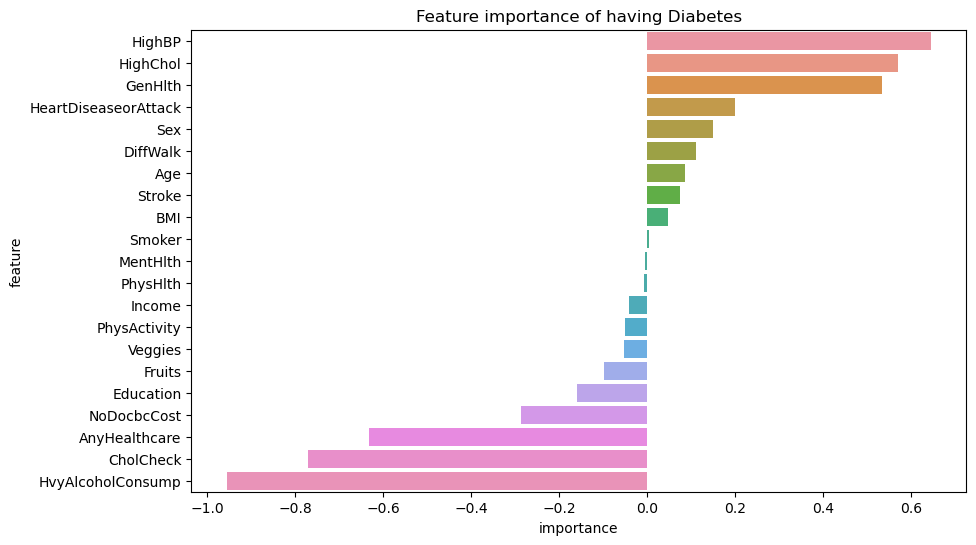

In [59]:
feature_importance = pd.DataFrame({'feature': data.columns, 'importance': logreg.coef_[0]})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature importance of having Diabetes')
plt.show()

In [51]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test
4,Random Forest,99.35,84.37
3,Decision Tree Classifier,99.35,77.61
0,Logistic Regression,84.59,84.56
1,Perceptron,84.31,83.99
2,Naive Bayes,76.56,77.01


In [52]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Score_diff
0,Logistic Regression,84.59,84.56,0.03
1,Perceptron,84.31,83.99,0.32
2,Naive Bayes,76.56,77.01,0.45
4,Random Forest,99.35,84.37,14.98
3,Decision Tree Classifier,99.35,77.61,21.74


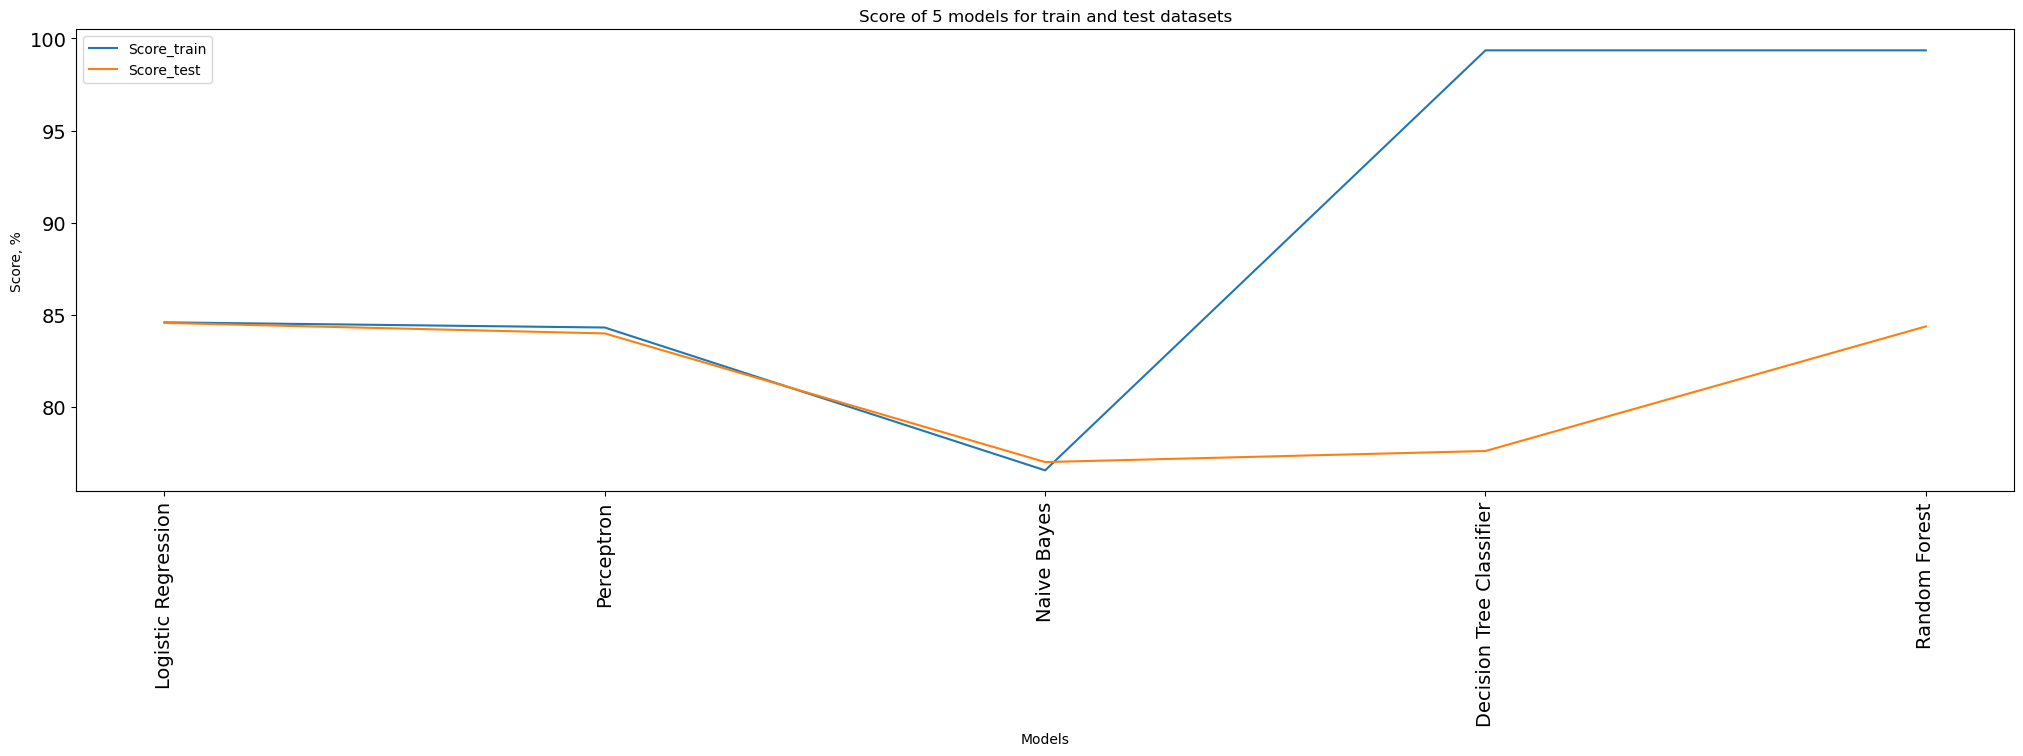

In [53]:
# Plotting the accuracy of each model
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 5 models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()